# Linear Regression Template

Let's build our first Machine Learning model: *Linear Regression*. This is a template you can reuse when you'll be building your own models. 

## What you will learn in this course 🧐🧐

* Create linear regressions using `sklearn` 
* Visualize your model's performance with `matplotlib`

## Step 1 - Preprocessing 🍳

As you already know, there is always a preprocessing step that includes: 

* Importing libraries 
* Importing data 
* Seperate target & feature variable 
* Split data into training and testing set
* Standardize data 


Let's do that here: 

In [4]:
# Import
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
# Import & visualize dataset
df = pd.read_csv("src/salary_data.csv")
df.head() 

,Country,YearsExperience,Salary
0,France,1.1,39343.0
1,United-Kingdom,1.3,46205.0
2,France,1.5,37731.0
3,France,2.0,43525.0
4,Germany,2.2,39891.0


In [12]:
# Print the shape of dataset in the form of (#rows, #columns)
print(df.shape)

# Describe dataset's main statistics
print(df.describe(include="all"))

(30, 3)
               Country  YearsExperience         Salary
count               30        30.000000      30.000000
unique               3              NaN            NaN
top     United-Kingdom              NaN            NaN
freq                12              NaN            NaN
mean               NaN         5.313333   76003.000000
std                NaN         2.837888   27414.429785
min                NaN         1.100000   37731.000000
25%                NaN         3.200000   56720.750000
50%                NaN         4.700000   65237.000000
75%                NaN         7.700000  100544.750000
max                NaN        10.500000  122391.000000


In [13]:
# Separate target variable Y from features X
print("Separating target variable from features...")

## Choose the columns you want to have as your features
features_list = ["Country","YearsExperience"]

X = df.loc[:,features_list] # We add feature_list into our loc 
y = df.loc[:,"Salary"] # We set "Salary" as the target variable

print("...Done.")
print()

Separating target variable from features...
...Done.



👋 You could have used `iloc` as well. Whatever is handy for you. 

In [14]:
# Divide dataset Train set & Test set 
## First we import train_test_split


print("Splitting dataset into train set and test set...")
## Then we use train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0)

print("...Done.")                                                                

Splitting dataset into train set and test set...
...Done.


👋 `test_size=0.2` is completely arbitrary. You choose whaveter proportion suits you. 

In [15]:
### Training pipeline ###
print("--- Training pipeline ---")
print()  

# Encoding categorical features and standardizing numeric features

print("#### X_train BEFORE preprocessing ####")
print(X_train.head())
print()

print("Encoding categorical features and standardizing numerical features...")
## First let's import libraries
## StandardScaler to scale data (i.e apply Z-score)
## OneHotEncoder to encode categorical variables


numeric_features = [1] # Choose which column index we are going to scale
numeric_transformer = StandardScaler()

categorical_features = [0] 
categorical_transformer = OneHotEncoder()


# Apply ColumnTransformer to create a pipeline that will apply the above preprocessing
feature_encoder = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),    
        ('num', numeric_transformer, numeric_features)
        ]
    )

X_train = feature_encoder.fit_transform(X_train)
print("...Done.")
print("#### X_train AFTER preprocessing ####")
print(X_train[0:5,:]) # print first 5 rows (not using iloc since now X_train became a numpy array)
print()

--- Training pipeline ---

#### X_train BEFORE preprocessing ####
           Country  YearsExperience
27  United-Kingdom              9.6
11  United-Kingdom              4.0
17  United-Kingdom              5.3
22          France              7.9
5   United-Kingdom              2.9

Encoding categorical features and standardizing numerical features...
...Done.
#### X_train AFTER preprocessing ####
[[ 0.          0.          1.          1.75832984]
 [ 0.          0.          1.         -0.40973925]
 [ 0.          0.          1.          0.09356251]
 [ 1.          0.          0.          1.10016601]
 [ 0.          0.          1.         -0.83560996]]



## Step 2 - Build the model 🏋️‍♂️

Let's now create your model. With `sklearn`, you'll see that it's not that long! 

In [16]:
# Train model
print("Train model...")
regressor = LinearRegression()
regressor.fit(X_train, y_train) # This steps is the actual training !
print("...Done.")

Train model...
...Done.


Let's now test our model and see its predictions 

In [17]:
# Predictions on training set
print("Predictions on training set...")
y_train_pred = regressor.predict(X_train)
print("...Done.")
print(y_train_pred[:5]) # print first 5 rows (not using iloc since now y_train became a numpy array)
print()

Predictions on training set...
...Done.
[118002.7170578   66176.7536895   78207.7809      99506.0692039
  55996.65374215]



Let's now reproduce the same process on the test set and compare performance. 

In [18]:
### Testing pipeline ###
print("--- Testing pipeline ---")

# Standardizing numeric features
print("Standardizing numerical features...")
print(X_test)
print()

X_test = feature_encoder.transform(X_test)

print("...Done.")
print(X_test[:5]) # print first 5 rows (not using iloc since now X_test became a numpy array)
print()

--- Testing pipeline ---
Standardizing numerical features...
           Country  YearsExperience
2           France              1.5
28          France             10.3
13          France              4.1
10  United-Kingdom              3.9
26  United-Kingdom              9.5
24          France              8.7

...Done.
[[ 1.          0.          0.         -1.37762723]
 [ 1.          0.          0.          2.02933848]
 [ 1.          0.          0.         -0.37102373]
 [ 0.          0.          1.         -0.44845477]
 [ 0.          0.          1.          1.71961432]]



In [19]:
# Predictions on test set
print("Predictions on test set...")
y_test_pred = regressor.predict(X_test)
print("...Done.")
print(y_test_pred[:5])
print()

Predictions on test set...
...Done.
[ 40276.39678298 121717.19636174  64338.45120398  65251.29005792
 117077.25342622]



## Step 3 - Evaluate your model 🌡️

Now, we can visualize our results and evaluate our model. Visualizing in graph is optional because depending on your model, it will be harder to build a 2D graph. However, we can always evaluate performance using a metric. 

For regression, we often use $R^2$. Let's do that using `sklearn` again. To evaluate our model, we will try to compare $R^2$ on the train set and on the test set. 

In [20]:
# Performance assessment
print("--- Assessing the performances of the model ---")

# Print R^2 scores
print("R2 score on training set : ", regressor.score(X_train, y_train))
print("R2 score on test set : ", regressor.score(X_test, y_test))

--- Assessing the performances of the model ---
R2 score on training set :  0.9470411990902998
R2 score on test set :  0.9892203639925101


Depending on the results, we will be able to tell if the model is performing well and whether it is overfitting or not. 

* $R^2$ close to 1 means good performance 
* $R^2_{train}$ > $R^2_{test}$ means overfitting 
* $R^2_{train}$ < $R^2_{test}$ means underfitting 

If you want to read more on overfitting in our blog: 👉 [What is overfitting?](https://www.jedha.co/blog/quest-ce-que-loverfitting) 👈

## Step 4 - Feature importance 🥕

Finally, what is interesting would be to see which features are important in your model. To do so, you can check out your model's coefficients! 

🚨 If you want to interpret coefficients, make sure you NORMALIZED your data in the preprocessing part 🚨

First, let's see how we can see how we can check out our coefficients: 

In [21]:
print("coefficients are: ", regressor.coef_) 
print("Constant is: ", regressor.intercept_)

coefficients are:  [ -290.80396519 -2182.15818671  2472.9621519  23904.2028923 ]
Constant is:  73498.28163844894


Now that we have the coefficients, we need to know which columns are associated with each one. If you look at `X_train` (or `X_test`), here is what you have:

In [22]:
X_train[:5] # Visualize the first 5 rows of your X_train

array([[ 0.        ,  0.        ,  1.        ,  1.75832984],
       [ 0.        ,  0.        ,  1.        , -0.40973925],
       [ 0.        ,  0.        ,  1.        ,  0.09356251],
       [ 1.        ,  0.        ,  0.        ,  1.10016601],
       [ 0.        ,  0.        ,  1.        , -0.83560996]])

If you look at your data, you can deduce that the columns are in the following order:

1. France
2. Germany 
3. United Kingdom 
4. Years of Experience (Normalized)

But how can we show it in a DataFrame? Well first, we need to use the [`.categories_`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html?highlight=one%20hot%20encoder#sklearn.preprocessing.OneHotEncoder) attribute from [`OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html?highlight=one%20hot%20encoder#sklearn.preprocessing.OneHotEncoder). 

Since we use `ColumnTransformer`, we need to access `OneHotEncoder` using `.transformers_` 

In [23]:
# Access transformers from feature_encoder
print("All transformers are: ", feature_encoder.transformers_)

# Access one specific transformer
print("One Hot Encoder transformer is: ", feature_encoder.transformers_[0][1])

All transformers are:  [('cat', OneHotEncoder(), [0]), ('num', StandardScaler(), [1])]
One Hot Encoder transformer is:  OneHotEncoder()


Now we can simply check the categories

In [24]:
# Print categories
categorical_column_names = feature_encoder.transformers_[0][1].categories_
print("Categorical columns are: ", categorical_column_names)

Categorical columns are:  [array(['France', 'Germany', 'United-Kingdom'], dtype=object)]


Now we can concatenate them with the numerical column names. We will use `numeric_features` variable to determine the name of our columns

In [25]:
numerical_column_names = X.iloc[:, numeric_features].columns # using the .columns attribute gives us the name of the column 
print("numerical columns are: ", numerical_column_names)

numerical columns are:  Index(['YearsExperience'], dtype='object')


Finally, we need to concatenate our `numerical_column_names` and our `categorical_column_names`. The easiest way to do it is by using [np.append](https://numpy.org/doc/stable/reference/generated/numpy.append.html)

In [26]:
# Append all columns 
all_column_names = np.append(categorical_column_names, numerical_column_names)
all_column_names

array(['France', 'Germany', 'United-Kingdom', 'YearsExperience'],
      dtype=object)

Now we can finally rank all columns by importance using coefficients 🥰

In [27]:
# Feature importance 
feature_importance = pd.DataFrame({
    "feature_names": all_column_names,
    "coefficients":regressor.coef_
})

feature_importance

,feature_names,coefficients
0,France,-290.803965
1,Germany,-2182.158187
2,United-Kingdom,2472.962152
3,YearsExperience,23904.202892


Now you know that you model is: 

$y=23904\times YearsExperience + 2472 \times UK - 2182 \times Germany  -290\times France + 73498$

You can be very fancy and try to use `seaborn` to visualize feature importance 🌟

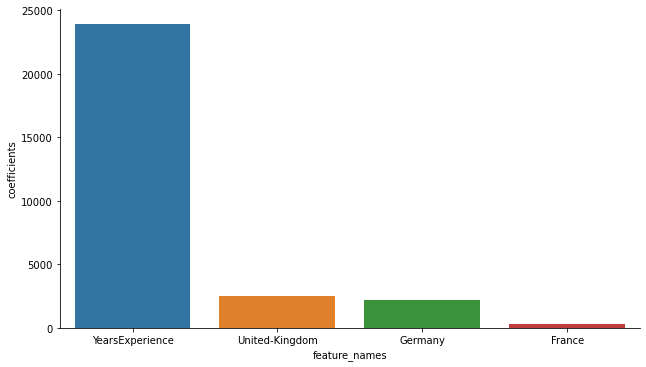

In [28]:
# Set coefficient to absolute values to rank features
feature_importance["coefficients"] = feature_importance["coefficients"].abs()

# Visualize ranked features using seaborn
sns.catplot(x="feature_names", 
            y="coefficients", 
            data=feature_importance.sort_values(by="coefficients", ascending=False), 
            kind="bar",
            aspect=16/9) # Resize graph

## Resources 📚📚

* Linear and Quadratic Discriminant Analysis - [https://bit.ly/20Csax](https://scikit-learn.org/stable/modules/lda_qda.html)

* What is overfitting - [https://bit.ly/30Cssas](https://www.jedha.co/blog/quest-ce-que-loverfitting)